**Projeto Marketing Analytics**

In [175]:
from platform import python_version
print("A versão do python utilizada nesse projeto é a: ", python_version())

A versão do python utilizada nesse projeto é a:  3.7.13


In [176]:
!pip install -q -U watermark

In [177]:
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as m
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
plt.style.use("fivethirtyeight")
plt.figure(1, figsize = (15, 6))
%matplotlib inline

In [178]:
%reload_ext watermark
%watermark -a "Diego Oliveira da Silva" --iversions

Author: Diego Oliveira da Silva

seaborn   : 0.11.2
matplotlib: 3.2.2
sklearn   : 0.0
numpy     : 1.21.5
IPython   : 5.5.0
pandas    : 1.3.5



In [179]:
df_delivery_ifood = pd.read_csv("dataset.csv", encoding = "utf-8")

In [180]:
df_delivery_ifood.shape

(260645, 7)

In [181]:
df_delivery_ifood.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [182]:
df_delivery_ifood.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [183]:
df_delivery_ifood.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [184]:
df_delivery_ifood.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [185]:
total_pedidos = []

In [186]:
df_delivery_ifood

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059
...,...,...,...,...,...,...,...
260640,0x75ab27,2019-04-03 11:31:00,5,sobremesa,1,41.881818,-87.640234
260641,0x560060,2019-08-09 00:23:00,6,pizza,2,41.784576,-87.607565
260642,0x560060,2019-08-09 00:23:00,6,sobremesa,2,41.784576,-87.607565
260643,0x132dce,2019-08-22 13:41:00,7,salada,1,41.794132,-88.010140


In [187]:
%%time
print("Iniciando o agrupamento para o cálculo total dos pedidos, irá demorar um pouco...")
horario_pedido = df_delivery_ifood["horario_pedido"]
for k, group in df_delivery_ifood.groupby('id_transacao'):  
  for m, n in group.groupby("horario_pedido"):
    id_transacao = k
    hora_pedido = m
    localidade = n["localidade"].values.tolist()[0]
    bebida = 0
    sobremesa = 0
    pizza = 0
    salada = 0
    n = n.reset_index(drop = True)
    for i in range(len(n)):
      item = n.loc[i, "nome_item"]
      num = n.loc[i, "quantidade_item"]
      if item == "bebida":
        bebida += num
      elif item == "pizza":
        pizza += num
      elif item == "sobremesa":
        sobremesa += num
      elif item == "salada":
        salada += num
    output = [id_transacao, horario_pedido, localidade, bebida, pizza, sobremesa, salada]
    total_pedidos.append(output)
print("\nAgrupamento concluído!")

Iniciando o agrupamento para o cálculo total dos pedidos, irá demorar um pouco...

Agrupamento concluído!
CPU times: user 1min 54s, sys: 1.72 s, total: 1min 56s
Wall time: 2min 1s


In [188]:
df_item_pedidos = pd.DataFrame(total_pedidos)

In [189]:
df_item_pedidos

,0,1,2,3,4,5,6
0,0x10000a,0 2019-01-16 18:33:00 1 2019-0...,9,0,1,1,0
1,0x100058,0 2019-01-16 18:33:00 1 2019-0...,6,0,2,2,0
2,0x1000c8,0 2019-01-16 18:33:00 1 2019-0...,9,4,4,5,1
3,0x10014c,0 2019-01-16 18:33:00 1 2019-0...,6,0,1,1,0
4,0x1001d8,0 2019-01-16 18:33:00 1 2019-0...,2,3,3,3,0
...,...,...,...,...,...,...,...
99995,0xffe96,0 2019-01-16 18:33:00 1 2019-0...,4,4,4,4,0
99996,0xffeed,0 2019-01-16 18:33:00 1 2019-0...,2,0,1,1,0
99997,0xfff07,0 2019-01-16 18:33:00 1 2019-0...,2,1,1,1,0
99998,0xfff4d,0 2019-01-16 18:33:00 1 2019-0...,3,0,2,2,0


In [190]:
df_item_pedidos.columns = ["id_transacao", "horario_pedido", "localidade", "bebida", "pizza", "sobremesa", "Salada"]

In [191]:
df_item_pedidos.head()

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,Salada
0,0x10000a,0 2019-01-16 18:33:00 1 2019-0...,9,0,1,1,0
1,0x100058,0 2019-01-16 18:33:00 1 2019-0...,6,0,2,2,0
2,0x1000c8,0 2019-01-16 18:33:00 1 2019-0...,9,4,4,5,1
3,0x10014c,0 2019-01-16 18:33:00 1 2019-0...,6,0,1,1,0
4,0x1001d8,0 2019-01-16 18:33:00 1 2019-0...,2,3,3,3,0


In [192]:
df_delivery_ifood.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


In [193]:

df_delivery_ifood.drop(columns=["latitude", "longitude"]) 

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2
3,0x12b47f,2019-09-04 12:36:00,3,salada,1
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1
...,...,...,...,...,...
260640,0x75ab27,2019-04-03 11:31:00,5,sobremesa,1
260641,0x560060,2019-08-09 00:23:00,6,pizza,2
260642,0x560060,2019-08-09 00:23:00,6,sobremesa,2
260643,0x132dce,2019-08-22 13:41:00,7,salada,1


In [194]:
df_item_pedidos.index

RangeIndex(start=0, stop=100000, step=1)

In [195]:
df_item_pedidos_idx = df_item_pedidos.reset_index()

In [196]:
df_item_pedidos_idx.head()

,index,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,Salada
0,0,0x10000a,0 2019-01-16 18:33:00 1 2019-0...,9,0,1,1,0
1,1,0x100058,0 2019-01-16 18:33:00 1 2019-0...,6,0,2,2,0
2,2,0x1000c8,0 2019-01-16 18:33:00 1 2019-0...,9,4,4,5,1
3,3,0x10014c,0 2019-01-16 18:33:00 1 2019-0...,6,0,1,1,0
4,4,0x1001d8,0 2019-01-16 18:33:00 1 2019-0...,2,3,3,3,0


In [197]:
df_item_pedidos

,id_transacao,horario_pedido,localidade,bebida,pizza,sobremesa,Salada
0,0x10000a,0 2019-01-16 18:33:00 1 2019-0...,9,0,1,1,0
1,0x100058,0 2019-01-16 18:33:00 1 2019-0...,6,0,2,2,0
2,0x1000c8,0 2019-01-16 18:33:00 1 2019-0...,9,4,4,5,1
3,0x10014c,0 2019-01-16 18:33:00 1 2019-0...,6,0,1,1,0
4,0x1001d8,0 2019-01-16 18:33:00 1 2019-0...,2,3,3,3,0
...,...,...,...,...,...,...,...
99995,0xffe96,0 2019-01-16 18:33:00 1 2019-0...,4,4,4,4,0
99996,0xffeed,0 2019-01-16 18:33:00 1 2019-0...,2,0,1,1,0
99997,0xfff07,0 2019-01-16 18:33:00 1 2019-0...,2,1,1,1,0
99998,0xfff4d,0 2019-01-16 18:33:00 1 2019-0...,3,0,2,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

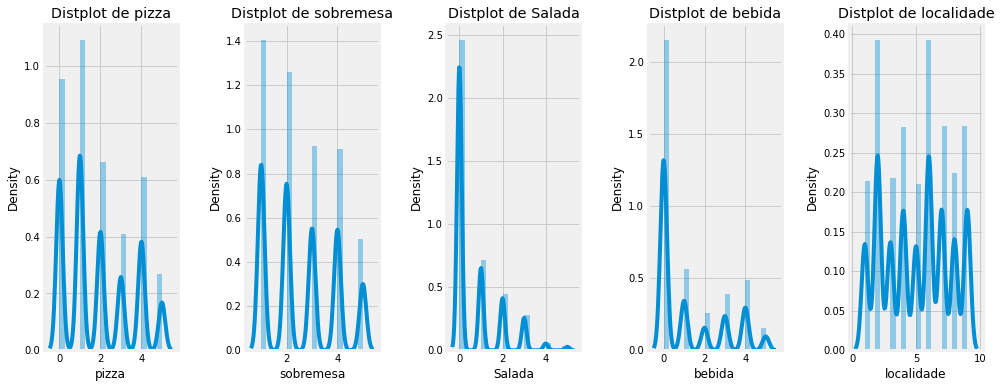

In [198]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['pizza' , 'sobremesa' , 'Salada', 'bebida', 'localidade']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_item_pedidos[x] , bins = 20)
    plt.title('Distplot de {}'.format(x))
plt.show()

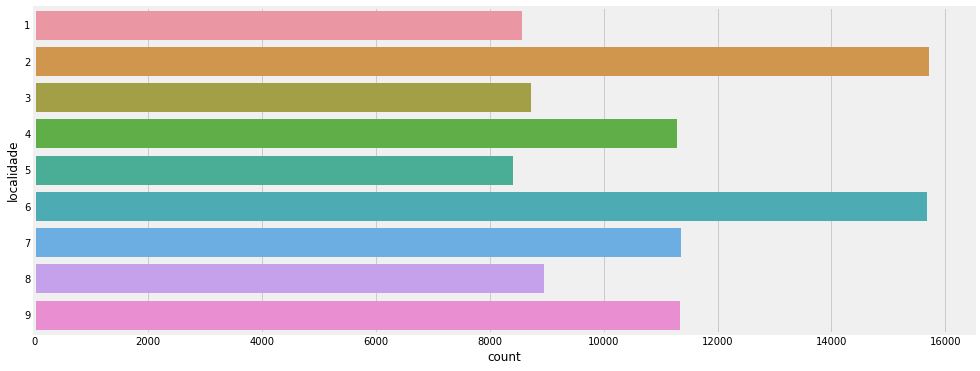

In [199]:
plt.figure(1, figsize = (15, 6))
sns.countplot(y = "localidade", data = df_item_pedidos)
plt.show()

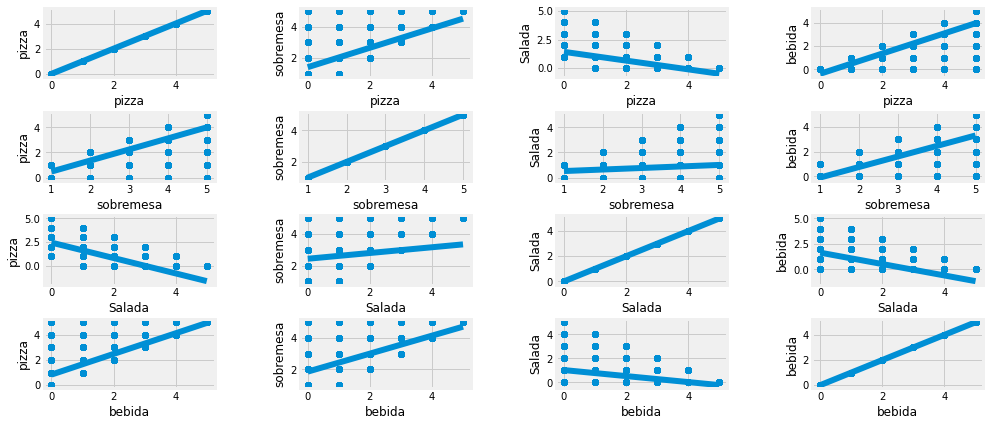

In [200]:
plt.figure(1, figsize = (15, 7))
n = 0
for x in ["pizza", "sobremesa", "Salada", "bebida"]:
  for y in ["pizza", "sobremesa", "Salada", "bebida"]:
    n += 1
    plt.subplot(4, 4, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(x = x, y = y, data = df_item_pedidos)
    plt.ylabel(y)
plt.show()

In [201]:
df = df_item_pedidos_idx[["index", "pizza", "Salada", "sobremesa", "bebida"]]

In [202]:
df.head()

,index,pizza,Salada,sobremesa,bebida
0,0,1,0,1,0
1,1,2,0,2,0
2,2,4,1,5,4
3,3,1,0,1,0
4,4,3,0,3,3


In [203]:
X1 = df[["pizza", "sobremesa"]].iloc[:,:].values

In [204]:
wcss_X1 = []

In [205]:
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    wcss_X1.append(modelo.inertia_)

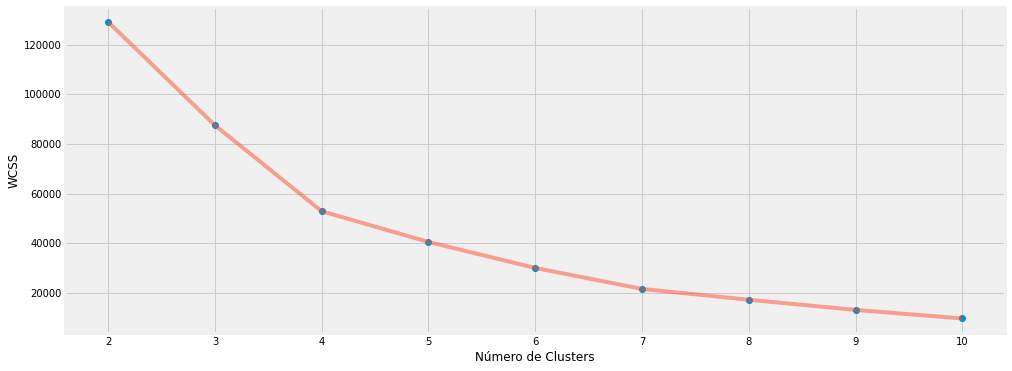

In [206]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

In [208]:
modelo_seg1 = KMeans(n_clusters = 2, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

In [209]:
modelo_seg1.fit(X1)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [210]:
labels1 = modelo_seg1.labels_
labels1

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [211]:
centroids1 = modelo_seg1.cluster_centers_
centroids1

array([[0.881644  , 1.82183485],
       [3.79958153, 4.05580631]])

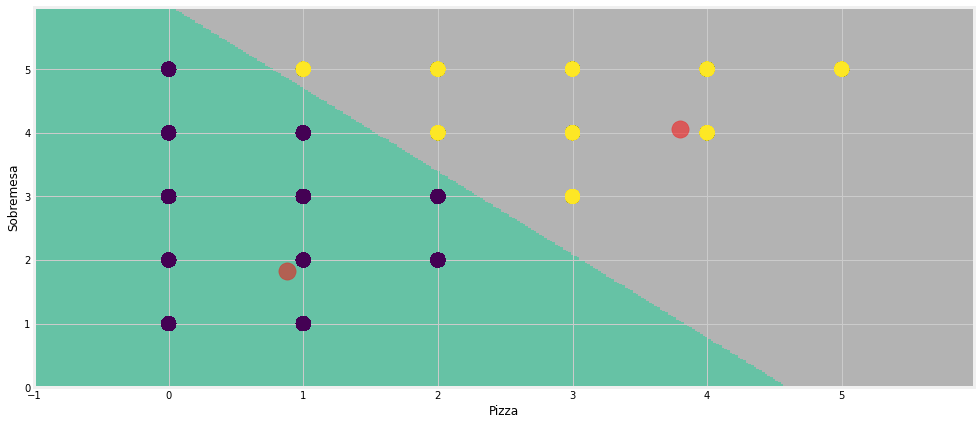

In [212]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo_seg1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

plt.scatter( x = 'pizza', y = 'sobremesa', data = df, c = labels1, s = 200 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()